# Cross SMA with the __`SMABacktester`__ Class

---

# Using the SMABacktester Class

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brute
plt.style.use("seaborn-v0_8")

In [2]:
df = pd.read_csv("../Data/forex_pairs.csv", parse_dates = ["Date"], index_col = "Date")
df

,AUDEUR=X,EURUSD=X,USDGBP=X
Date,,,
2004-01-01,0.59780,1.258194,0.56016
2004-01-02,0.60314,1.258194,0.55751
2004-01-05,0.60467,1.268698,0.55334
2004-01-06,0.60350,1.272103,0.54906
2004-01-07,0.60728,1.264095,0.55012
...,...,...,...
2020-06-24,0.61349,1.131235,0.79841
2020-06-25,0.60938,1.125087,0.80561
2020-06-26,0.61373,1.122208,0.80480


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4295 entries, 2004-01-01 to 2020-06-30
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   AUDEUR=X  4274 non-null   float64
 1   EURUSD=X  4275 non-null   float64
 2   USDGBP=X  4287 non-null   float64
dtypes: float64(3)
memory usage: 134.2 KB


In [4]:
import SMABacktester as SMA

In [5]:
tester = SMA.SMABacktester(symbol="EURUSD=X",
                           SMA_S= 50,
                           SMA_L= 200, 
                           start= "2004-01-01", 
                           end= "2020-06-30",
                           ptc= 0.00007)

In [6]:
tester

SMABacktester(symbol = EURUSD=X, SMA_S = 50, SMA_L = 200, start = 2004-01-01, end = 2020-06-30, ptc=7e-05)

In [7]:
tester.test_strategy()

(1.279732, 0.363906)

In [8]:
tester.results

,price,returns,SMA_S,SMA_L,position,strategy,trades,creturns,cstrategy
Date,,,,,,,,,
2004-10-07,1.229906,0.001475,1.221840,1.226081,-1,-0.001475,0.0,1.001476,0.998526
2004-10-08,1.241003,0.008982,1.222628,1.225995,-1,-0.008982,0.0,1.010511,0.989598
2004-10-11,1.238405,-0.002095,1.223352,1.225843,-1,0.002095,0.0,1.008396,0.991673
2004-10-12,1.232104,-0.005102,1.223888,1.225643,-1,0.005102,0.0,1.003265,0.996746
2004-10-13,1.234903,0.002270,1.224466,1.225497,-1,-0.002270,0.0,1.005545,0.994486
...,...,...,...,...,...,...,...,...,...
2020-06-24,1.131235,0.002892,1.101794,1.103430,-1,-0.002892,0.0,0.921130,1.267717
2020-06-25,1.125087,-0.005449,1.102486,1.103540,-1,0.005449,0.0,0.916125,1.274644
2020-06-26,1.122208,-0.002562,1.103213,1.103627,-1,0.002562,0.0,0.913781,1.277914


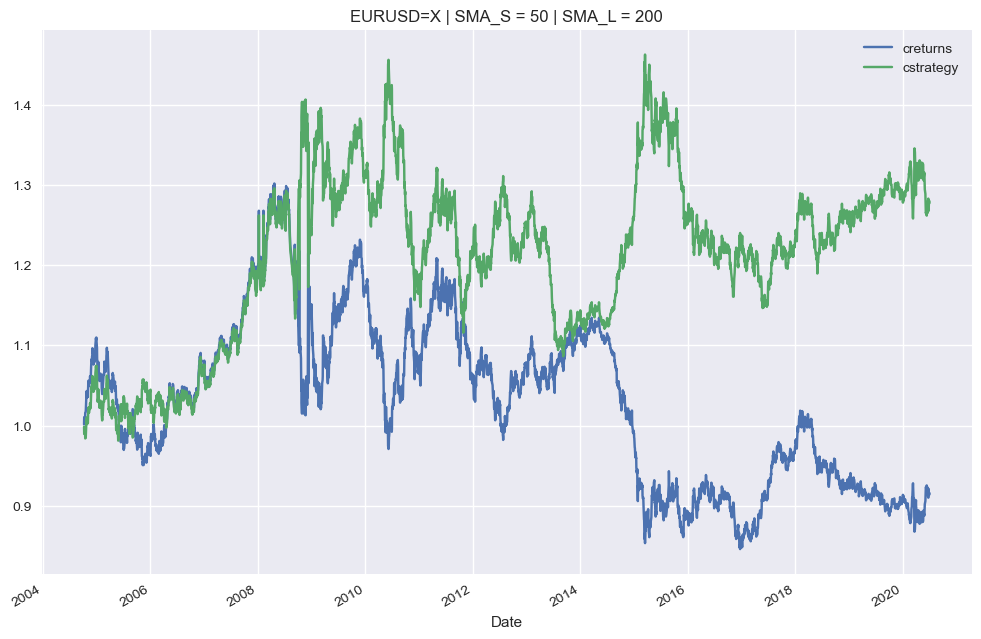

In [9]:
tester.plot_results()

In [10]:
tester.set_parameters(22, 100)

In [11]:
tester.test_strategy()

(1.156867, 0.219908)

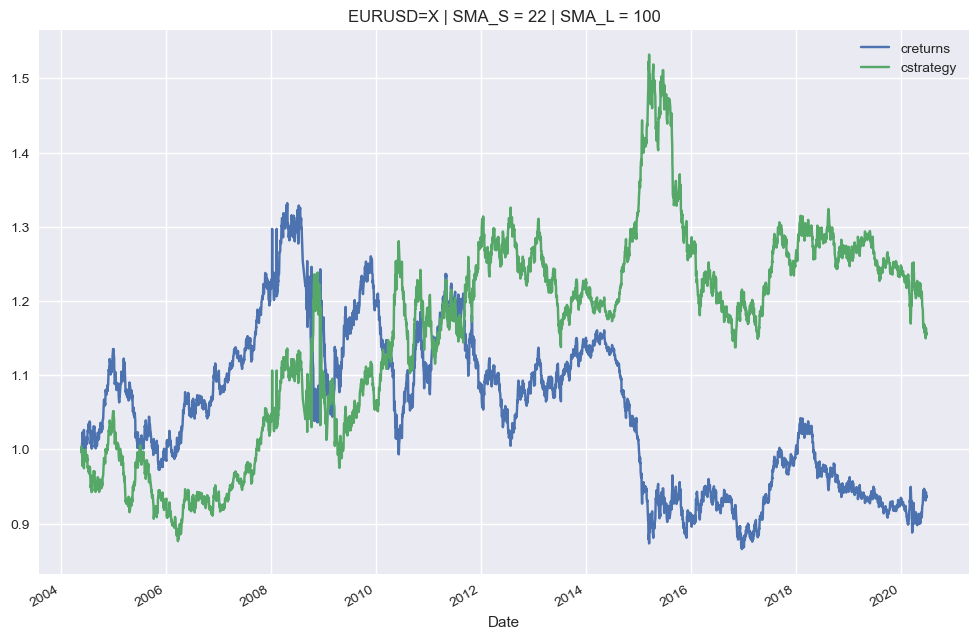

In [12]:
tester.plot_results()

In [13]:
tester.optimize_parameters((25, 50, 1), (100, 200, 1))

(array([ 46., 137.]), 2.517161)

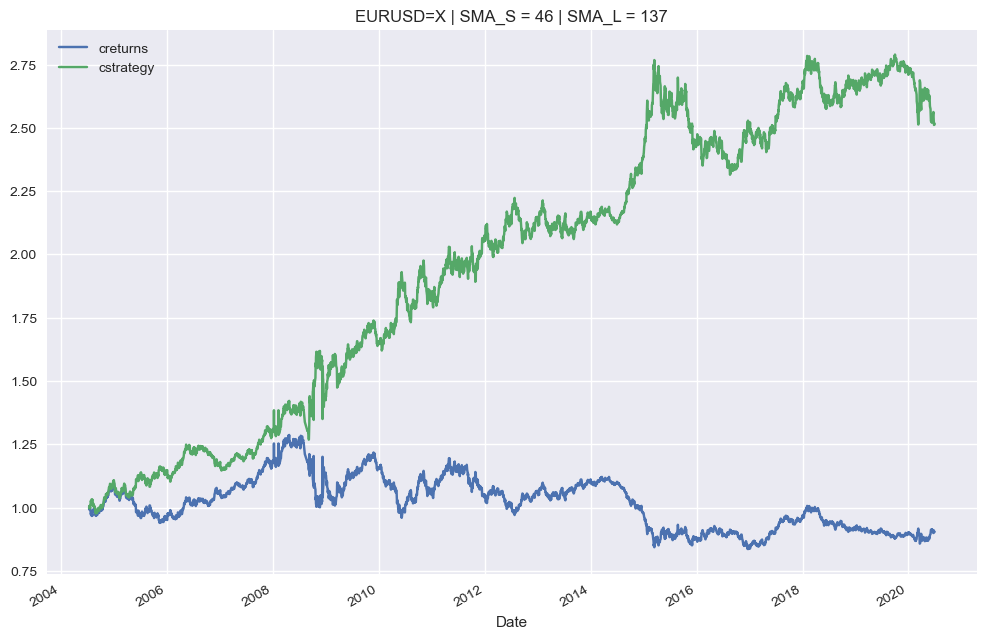

In [14]:
tester.plot_results()

__Backtesting & Forward Testing__

In [16]:
train = SMA.SMABacktester("EURUSD=X", 50, 200, "2004-01-01", "2015-12-31", 0.00007)

In [17]:
train.optimize_parameters((25, 50, 1), (100, 200, 1)) # optimizing strategy & backtesting ("in-sample")

(array([ 46., 137.]), 2.433711)

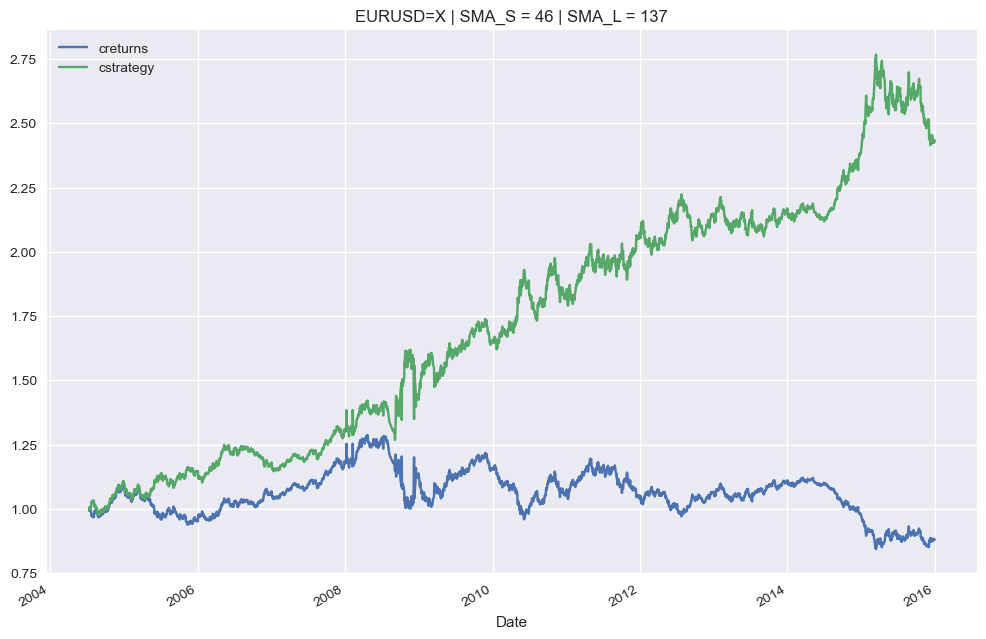

In [18]:
train.plot_results()

In [20]:
tester = SMA.SMABacktester("EURUSD=X", 46, 137, "2016-01-01", "2020-06-30",0.00007)

In [21]:
tester.test_strategy() # forward testing ("out-sample")

(1.055844, 0.037443)

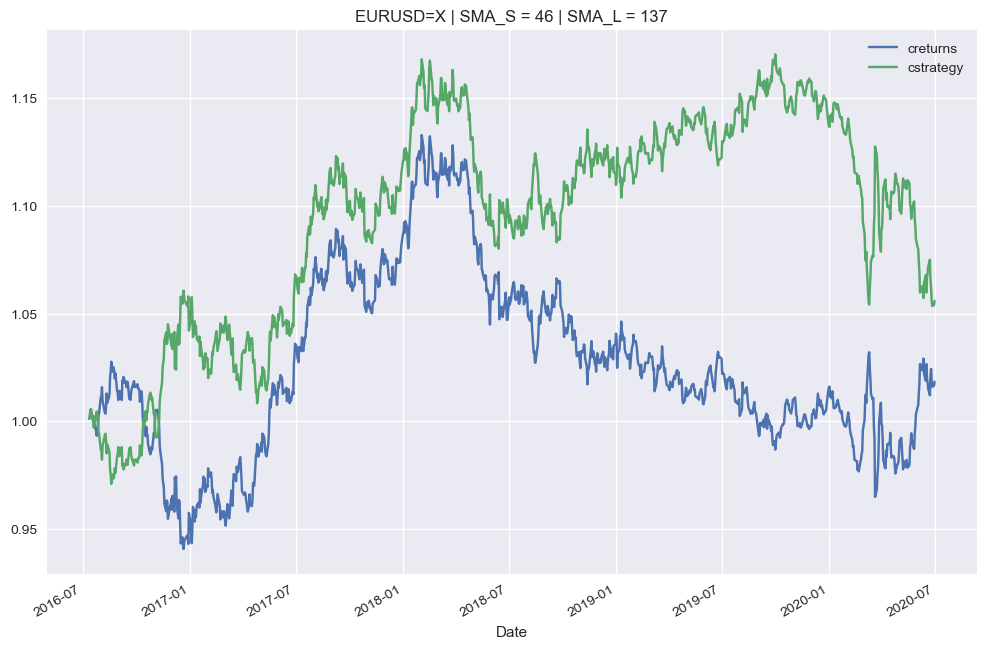

In [22]:
tester.plot_results()

In [23]:
tester = SMA.SMABacktester("AUDEUR=X", 50, 200, "2004-01-01", "2020-06-30",0.00007)

In [24]:
tester.test_strategy()

(1.141756, 0.102621)

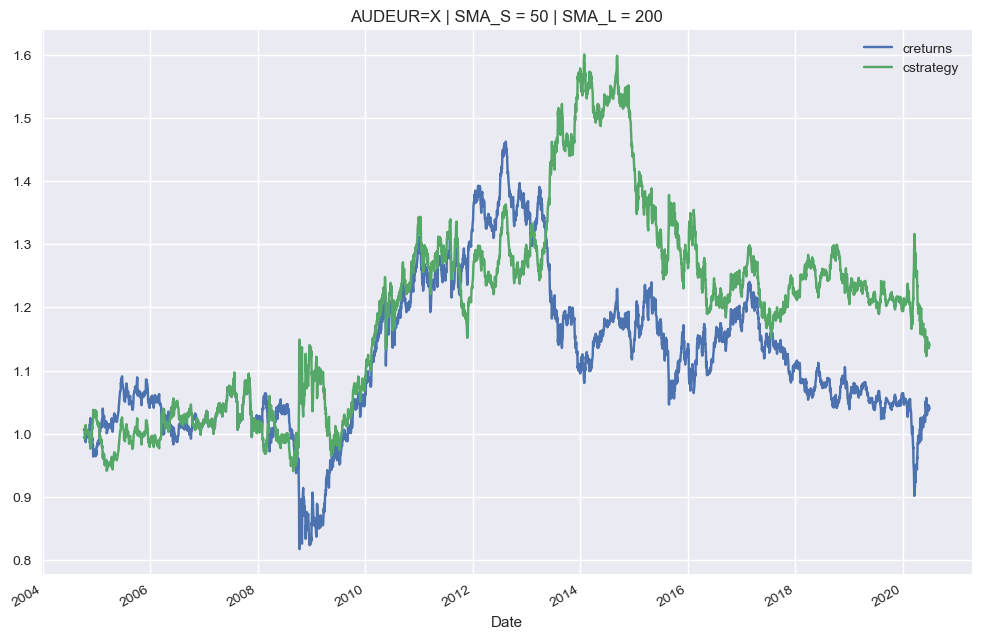

In [25]:
tester.plot_results()

In [26]:
tester.optimize_parameters((25, 50, 1), (100, 200, 1))

(array([ 33., 197.]), 1.450622)

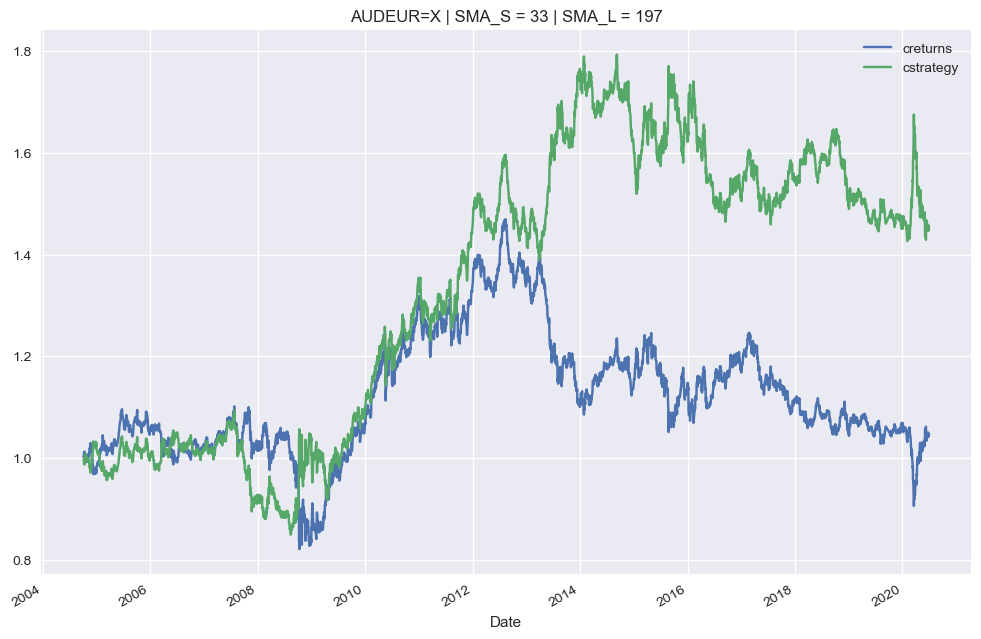

In [27]:
tester.plot_results()

---